<a href="https://colab.research.google.com/github/allycehtta2027/CursoPython/blob/main/Trabalho_Final_Atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

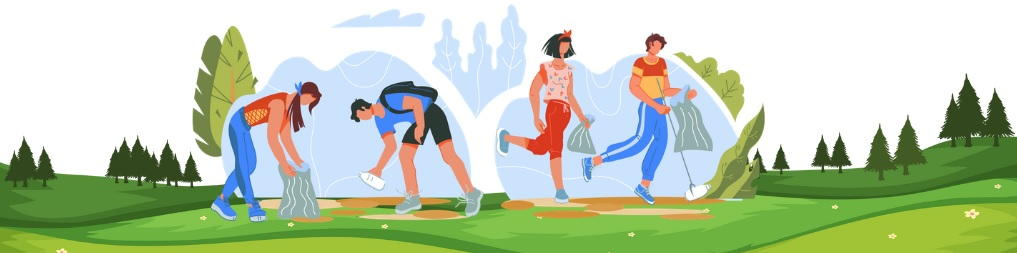

# Dataset: Reciclagem 2014 a 2024
- Autoria Própria.
- Previsão de Reciclagem.
- Geração e tratamento de resíduos sólidos em diversos países.
- Resíduos mundiais por países (incluindo varios os tipos de residuos até 2014-2024).
- Problema: Previsões da quantidade de lixo que o Brasil irá produzir em 2025 e quanto de lixo será reciclado.
- Dataset: https://raw.githubusercontent.com/rafaelflorentino/Python/refs/heads/main/IA/datasets/dataset_final.csv

# Bibliotecas usadas

In [ ]:
! pip install pandas

In [ ]:
! pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rafaelflorentino/Python/refs/heads/main/IA/datasets/dataset_final.csv")

In [ ]:
df.head()

,pais,ano,pib,populacao,lixo_organico,lixo_papel,lixo_metal,lixo_plastico,lixo_vidro,lixo_madeira,lixo_borracha,lixo_entulho,lixo_medico,outros_lixos,total_lixo,lixo_reciclado
0,Brasil,2014,2416000000000,202600000,18100000.0,7400000.0,2900000.0,4400000.0,1650000.0,800000.0,300000.0,2500000.0,400000.0,100000.0,79700000,32000000.0
1,Brasil,2015,2418000000000,204500000,18500000.0,7600000.0,2950000.0,4500000.0,1700000.0,850000.0,320000.0,2600000.0,450000.0,110000.0,81300000,33000000.0
2,Brasil,2016,2384000000000,206100000,19000000.0,7800000.0,3000000.0,4600000.0,1750000.0,900000.0,350000.0,2700000.0,500000.0,120000.0,83000000,34000000.0
3,Brasil,2017,2056000000000,207660000,20000000.0,8000000.0,3100000.0,4800000.0,1800000.0,950000.0,370000.0,2800000.0,550000.0,130000.0,85000000,35000000.0
4,Brasil,2018,2064000000000,209300000,21000000.0,8200000.0,3200000.0,4900000.0,1850000.0,1000000.0,400000.0,2900000.0,600000.0,140000.0,87000000,36000000.0


In [ ]:
df.shape

(1243, 16)

In [ ]:
df.dtypes

,0
pais,object
ano,int64
pib,int64
populacao,int64
lixo_organico,float64
lixo_papel,float64
lixo_metal,float64
lixo_plastico,float64
lixo_vidro,float64
lixo_madeira,float64


## Tratamento dos dados

In [ ]:
# Eliminar todos os valores vazios
#df = df.dropna()

# Tranformar coluna total_lixo em float
df['total_lixo'] = df['total_lixo'].astype(float)

# Calculando a média
df['lixo_reciclado'].mean()

# Atribuindo a mádia da reciclagem a valores vazios
df.loc[df.lixo_reciclado.isnull(),'lixo_reciclado'] = df['lixo_reciclado'].mean()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            1243 non-null   object 
 1   ano             1243 non-null   int64  
 2   pib             1243 non-null   int64  
 3   populacao       1243 non-null   int64  
 4   lixo_organico   1243 non-null   float64
 5   lixo_papel      1243 non-null   float64
 6   lixo_metal      1243 non-null   float64
 7   lixo_plastico   1243 non-null   float64
 8   lixo_vidro      1243 non-null   float64
 9   lixo_madeira    1243 non-null   float64
 10  lixo_borracha   1243 non-null   float64
 11  lixo_entulho    1243 non-null   float64
 12  lixo_medico     1243 non-null   float64
 13  outros_lixos    1243 non-null   float64
 14  total_lixo      1243 non-null   float64
 15  lixo_reciclado  1243 non-null   float64
dtypes: float64(12), int64(3), object(1)
memory usage: 155.5+ KB


In [ ]:
df.columns

Index(['ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel', 'lixo_metal',
       'lixo_plastico', 'lixo_vidro', 'lixo_madeira', 'lixo_borracha',
       'lixo_entulho', 'lixo_medico', 'outros_lixos', 'total_lixo',
       'lixo_reciclado'],
      dtype='object')

In [ ]:
# Contando valores vazios por coluna
df.isnull().sum()

,0
pais,0
ano,0
pib,0
populacao,0
lixo_organico,0
lixo_papel,0
lixo_metal,0
lixo_plastico,0
lixo_vidro,0
lixo_madeira,0


In [ ]:
# remover colunas que não são numéricas
df.drop(['pais'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel', 'lixo_metal',
       'lixo_plastico', 'lixo_vidro', 'lixo_madeira', 'lixo_borracha',
       'lixo_entulho', 'lixo_medico', 'outros_lixos', 'total_lixo',
       'lixo_reciclado'],
      dtype='object')

# Vamos usar o Coeficiente de Pearson para ver as relações entre as variáveis
- Medidas estatísticas que indicam a relação entre duas variáveis, podendo variar entre -1 e +1

In [ ]:
# criando matriz de correlação
df.corr()

,ano,pib,populacao,lixo_organico,lixo_papel,lixo_metal,lixo_plastico,lixo_vidro,lixo_madeira,lixo_borracha,lixo_entulho,lixo_medico,outros_lixos,total_lixo,lixo_reciclado
ano,1.000000,0.034191,0.007794,0.045518,0.034724,0.040100,0.042059,0.047028,0.062583,0.048220,0.022338,0.054303,0.027121,0.027970,0.028952
pib,0.034191,1.000000,0.554949,0.674884,0.760828,0.738101,0.718433,0.722973,0.779340,0.475458,0.606535,0.571648,0.281294,0.869268,0.821438
populacao,0.007794,0.554949,1.000000,0.912511,0.887036,0.915543,0.930962,0.928603,0.763949,0.924001,0.575099,0.594305,0.265538,0.848454,0.749208
lixo_organico,0.045518,0.674884,0.912511,1.000000,0.979749,0.981744,0.976294,0.962491,0.926746,0.817170,0.701996,0.717202,0.527120,0.904725,0.856791
lixo_papel,0.034724,0.760828,0.887036,0.979749,1.000000,0.993288,0.972360,0.959695,0.953991,0.780548,0.756338,0.738481,0.501762,0.945903,0.912520
lixo_metal,0.040100,0.738101,0.915543,0.981744,0.993288,1.000000,0.984265,0.974133,0.933480,0.830130,0.726003,0.722490,0.464419,0.942966,0.888983
lixo_plastico,0.042059,0.718433,0.930962,0.976294,0.972360,0.984265,1.000000,0.986254,0.915635,0.848912,0.696426,0.692657,0.427365,0.930092,0.862148
lixo_vidro,0.047028,0.722973,0.928603,0.962491,0.959695,0.974133,0.986254,1.000000,0.905977,0.882295,0.680394,0.690345,0.421552,0.926771,0.840261
lixo_madeira,0.062583,0.779340,0.763949,0.926746,0.953991,0.933480,0.915635,0.905977,1.000000,0.651755,0.814576,0.756396,0.509740,0.906585,0.911366
lixo_borracha,0.048220,0.475458,0.924001,0.817170,0.780548,0.830130,0.848912,0.882295,0.651755,1.000000,0.455692,0.500724,0.263787,0.743899,0.597602


In [ ]:
# Remover as colunas tipo object (não numéricas) no caso pais
df_correlacao = df.select_dtypes(exclude='object')

# Calcular a correlação entre variáveis do nosso interesse
correlacao_pib_lixo = df_correlacao['pib'].corr(df_correlacao['total_lixo'])
correlacao_populacao_lixo = df_correlacao['populacao'].corr(df_correlacao['total_lixo'])
correlacao_pib_reciclagem = df_correlacao['pib'].corr(df_correlacao['lixo_reciclado'])
correlacao_pib_populacao = df_correlacao['populacao'].corr(df_correlacao['lixo_reciclado'])
correlacao_ano_lixo = df_correlacao['ano'].corr(df_correlacao['total_lixo'])
correlacao_ano_reciclagem = df_correlacao['ano'].corr(df_correlacao['lixo_reciclado'])

print(f"Correlação entre PIB e Total Lixo: {correlacao_pib_lixo}")
print(f"Correlação entre População e Total Lixo: {correlacao_populacao_lixo}")
print(f"Correlação entre PIB e Total Reciclado: {correlacao_pib_reciclagem}")
print(f"Correlação entre População e Total Reciclado: {correlacao_pib_reciclagem}")
print(f"Correlação entre PIB e População: {correlacao_pib_populacao}")
print(f"Correlação entre Ano e Lixo Produzido: {correlacao_ano_lixo}")
print(f"Correlação entre Ano e Lixo Reciclado: {correlacao_ano_reciclagem}")

Correlação entre PIB e Total Lixo: 0.8692682971835343
Correlação entre População e Total Lixo: 0.8484537231538801
Correlação entre PIB e Total Reciclado: 0.8386107157601059
Correlação entre População e Total Reciclado: 0.8386107157601059
Correlação entre PIB e População: 0.7658085013189049
Correlação entre Ano e Lixo Produzido: 0.027969976695560398
Correlação entre Ano e Lixo Reciclado: 0.03678459412251052


# Criando um Mapa de Calor para ver a correlação entre as variáveis
## Gráfico Mapa de calor, Biblioteca Seaborn.

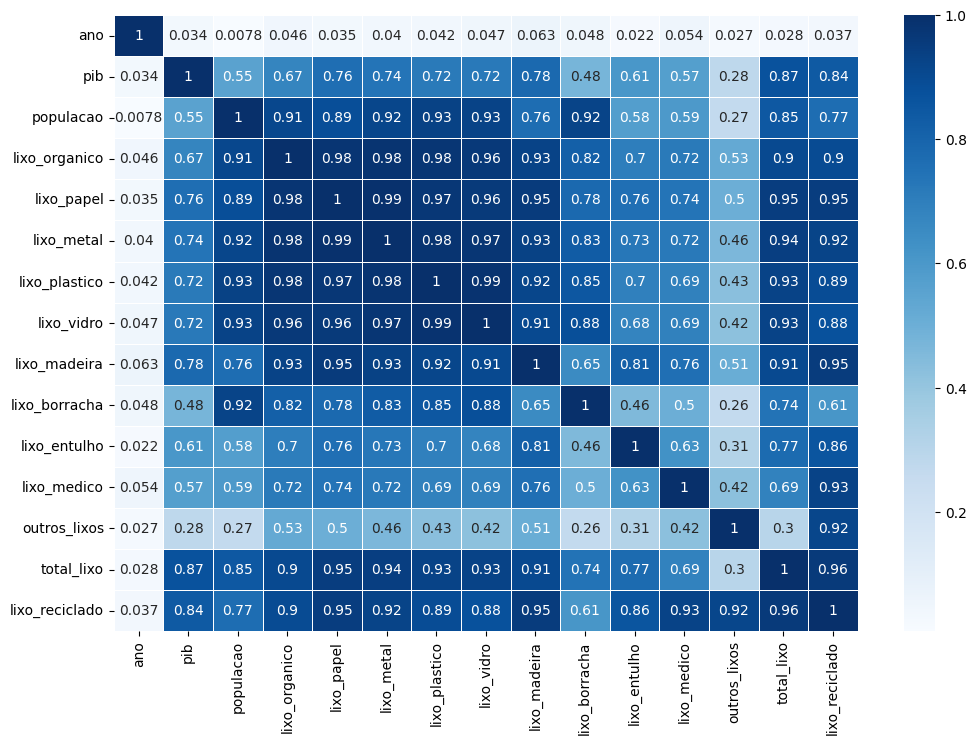

In [ ]:
# Gerando uma matriz de correlação, na cor azul.
fig, ax = plt.subplots(figsize=(12, 8))
_= sns.heatmap(df_correlacao.corr(), cmap='Blues', linewidth=0.5, annot = True)

## Filtrando Dados específicos, apenas do pais Brasil

In [ ]:
# Filtrar apenas os dados do pais Brasil
df = pd.read_csv("https://raw.githubusercontent.com/rafaelflorentino/Python/refs/heads/main/IA/datasets/dataset_final.csv")
df_brasil = df[df["pais"] == "Brasil"]
df_brasil

,pais,ano,pib,populacao,lixo_organico,lixo_papel,lixo_metal,lixo_plastico,lixo_vidro,lixo_madeira,lixo_borracha,lixo_entulho,lixo_medico,outros_lixos,total_lixo,lixo_reciclado
0,Brasil,2014,2416000000000,202600000,18100000.0,7400000.0,2900000.0,4400000.0,1650000.0,800000.0,300000.0,2500000.0,400000.0,100000.0,79700000,32000000.0
1,Brasil,2015,2418000000000,204500000,18500000.0,7600000.0,2950000.0,4500000.0,1700000.0,850000.0,320000.0,2600000.0,450000.0,110000.0,81300000,33000000.0
2,Brasil,2016,2384000000000,206100000,19000000.0,7800000.0,3000000.0,4600000.0,1750000.0,900000.0,350000.0,2700000.0,500000.0,120000.0,83000000,34000000.0
3,Brasil,2017,2056000000000,207660000,20000000.0,8000000.0,3100000.0,4800000.0,1800000.0,950000.0,370000.0,2800000.0,550000.0,130000.0,85000000,35000000.0
4,Brasil,2018,2064000000000,209300000,21000000.0,8200000.0,3200000.0,4900000.0,1850000.0,1000000.0,400000.0,2900000.0,600000.0,140000.0,87000000,36000000.0
5,Brasil,2019,2130000000000,210100000,22000000.0,8400000.0,3300000.0,5000000.0,1900000.0,1050000.0,420000.0,3000000.0,650000.0,150000.0,89000000,37000000.0
6,Brasil,2020,2143000000000,211000000,23000000.0,8600000.0,3400000.0,5100000.0,1950000.0,1100000.0,450000.0,3100000.0,700000.0,160000.0,91000000,38000000.0
7,Brasil,2021,2204000000000,212600000,24000000.0,8800000.0,3500000.0,5200000.0,2000000.0,1150000.0,480000.0,3200000.0,750000.0,170000.0,93000000,39000000.0
8,Brasil,2022,2375000000000,214000000,25000000.0,9000000.0,3600000.0,5300000.0,2050000.0,1200000.0,500000.0,3300000.0,800000.0,180000.0,95000000,40000000.0
9,Brasil,2023,2510000000000,215000000,26000000.0,9200000.0,3700000.0,5400000.0,2100000.0,1250000.0,530000.0,3400000.0,850000.0,190000.0,97000000,41000000.0


## Composição dos Resíduos no Brasil (Média)
- Gráfico de Pizza

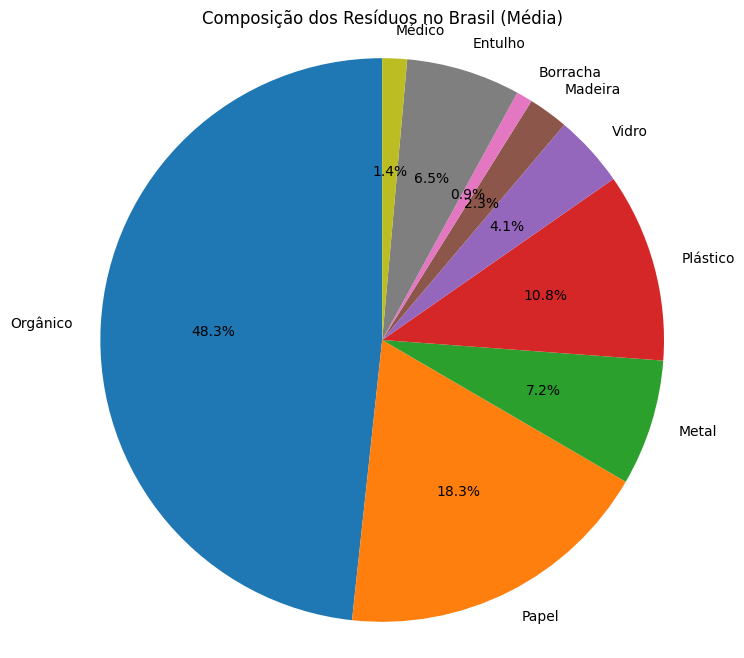

In [ ]:
import matplotlib.pyplot as plt

# Calculando a mádia das quantidades dos tipos de lixo
labels = ['Orgânico', 'Papel', 'Metal', 'Plástico', 'Vidro', 'Madeira', 'Borracha', 'Entulho', 'Médico']
sizes = [df_brasil['lixo_organico'].mean(), df_brasil['lixo_papel'].mean(), df_brasil['lixo_metal'].mean(), df_brasil['lixo_plastico'].mean(), df_brasil['lixo_vidro'].mean(), df_brasil['lixo_madeira'].mean(), df_brasil['lixo_borracha'].mean(), df_brasil['lixo_entulho'].mean(), df_brasil['lixo_medico'].mean()]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Composição dos Resíduos no Brasil (Média)')
_ = plt.axis('equal')  # equal = Proporção igual garante que a pizza seja desenhada como um círculo

## Composição dos Resíduos no Brasil ao Longo do Tempo
- Gráfico de Áreas Empilhadas (Stacked Area Plot)

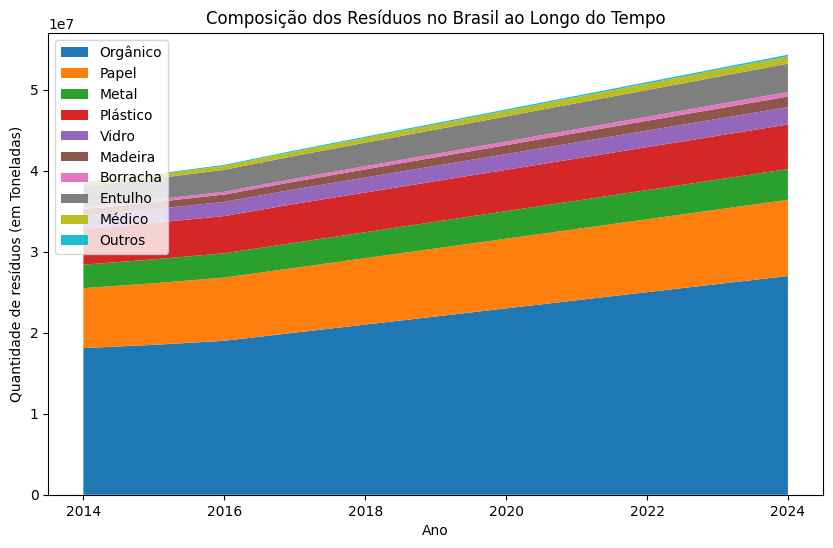

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.stackplot(df_brasil['ano'],
              df_brasil['lixo_organico'],
              df_brasil['lixo_papel'],
              df_brasil['lixo_metal'],
              df_brasil['lixo_plastico'],
              df_brasil['lixo_vidro'],
              df_brasil['lixo_madeira'],
              df_brasil['lixo_borracha'],
              df_brasil['lixo_entulho'],
              df_brasil['lixo_medico'],
              df_brasil['outros_lixos'],
              labels=['Orgânico', 'Papel', 'Metal', 'Plástico', 'Vidro', 'Madeira', 'Borracha', 'Entulho', 'Médico', 'Outros'])

plt.legend(loc='upper left')
plt.title('Composição dos Resíduos no Brasil ao Longo do Tempo')
plt.xlabel('Ano')
_ = plt.ylabel('Quantidade de resíduos (em Toneladas)')

# Relação População e lixo Produzido em gráfico
- Regressão Linear Simples
- Variável independente: população
- Gráfico de Disperção

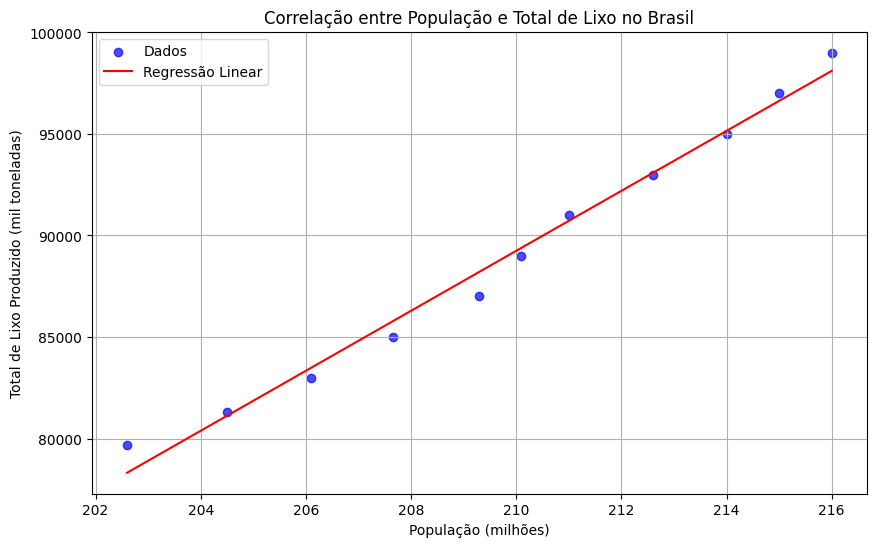

In [ ]:
# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Variáveis independentes e dependentes, ajustadas para unidades mais simples
X = df_brasil['populacao'] / 1e6  # População em milhões
y = df_brasil['total_lixo'] / 1e3  # Total de lixo em mil toneladas

# Calcular os coeficientes da regressão linear
coef = np.polyfit(X, y, 1) # calcula os coeficientes de uma linha reta (regressão linear), o coeficiente angular (inclinação) e coeficiente linear (intercepto).
poly1d_fn = np.poly1d(coef) # regressão que podemos usar para prever y a partir de X

# Configurar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados')

# Adicionar a linha de regressão linear
plt.plot(X, poly1d_fn(X), color='red', label='Regressão Linear')

# Adicionar título e rótulos
plt.title('Correlação entre População e Total de Lixo no Brasil')
plt.xlabel('População (milhões)')
plt.ylabel('Total de Lixo Produzido (mil toneladas)')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Prever o Valor de lixo que o Brasil ira produzir em 2025
- Regressão Linear Simples.
- Treino, Teste e Previsão.
- Variável independente (ano).
- Variável dependete (total_lixo).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Selecionar as colunas relevantes
X = df_brasil[['ano']]  # variável independente
y = df_brasil['total_lixo']  # variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com o conjunto de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Prever o valor para 2025
ano_2025 = pd.DataFrame({'ano': [2025]})
pred_lixo_2025 = model.predict(ano_2025)

print(f'Previsão do total de lixo para 2025: {pred_lixo_2025[0]} toneladas')


Mean Squared Error: 57849216840.27222
R^2 Score: 0.9987072800706085
Previsão do total de lixo para 2025: 100660051.54639196 toneladas


# Explicando as métricas
## 1. Mean Squared Error (MSE) - Erro Quadrático Médio
- O MSE é uma métrica que mede a média dos quadrados dos erros, ou seja, a diferença média entre os valores previstos pelo modelo e os valores reais.
- Valores mais baixos de MSE indicam um melhor ajuste do modelo: quanto menor o MSE, mais próximo o modelo está de prever corretamente os valores reais.

## 2. Coeficiente de Determinação (R²)
- O R², também conhecido como coeficiente de determinação, mede a proporção da variância nos dados dependentes que é previsível a partir dos dados independentes.
- Valores mais próximos de 1 indicam um melhor ajuste: Um R² alto (próximo de 1) significa que uma grande proporção da variância nos dados dependentes é explicada pelas variáveis independentes.

# Prever o Valor de lixo que o Brasil irá reciclar em 2025
- Regressão Linear Simples.
- Treino, Teste e Previsão.
- Variável independente (ano).
- Variável dependete (lixo_reciclado).

In [ ]:
# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Selecionar as colunas relevantes
X = df_brasil[['ano']]  # variável independente
y = df_brasil['lixo_reciclado']  # variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com o conjunto de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Prever o valor para 2025
ano_2025 = pd.DataFrame({'ano': [2025]})
pred_lixo_2025 = model.predict(ano_2025)

print(f'Previsão do total de lixo reciclado para 2025: {pred_lixo_2025[0]} toneladas')


Mean Squared Error: 5.684341886080802e-14
R^2 Score: 1.0
Previsão do total de lixo reciclado para 2025: 43000000.00000024 toneladas


# Modelo 1, Gráfico de Disperção
## Gráfico de Disperção
- Regressão Linear Simples.
- Treino, Teste e Previsão.
- Variável independente (ano).
- Variáveis dependetes (total_lixo, lixo_reciclado).

Previsão de total de lixo para 2025: 100660051.55 toneladas
Previsão de lixo reciclado para 2025: 43000000.00 toneladas

Métricas de desempenho para total de lixo (teste):
MAE: 233698.45
MSE: 57849216840.27
RMSE: 240518.64
R²: 1.00

Métricas de desempenho para lixo reciclado (teste):
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.00


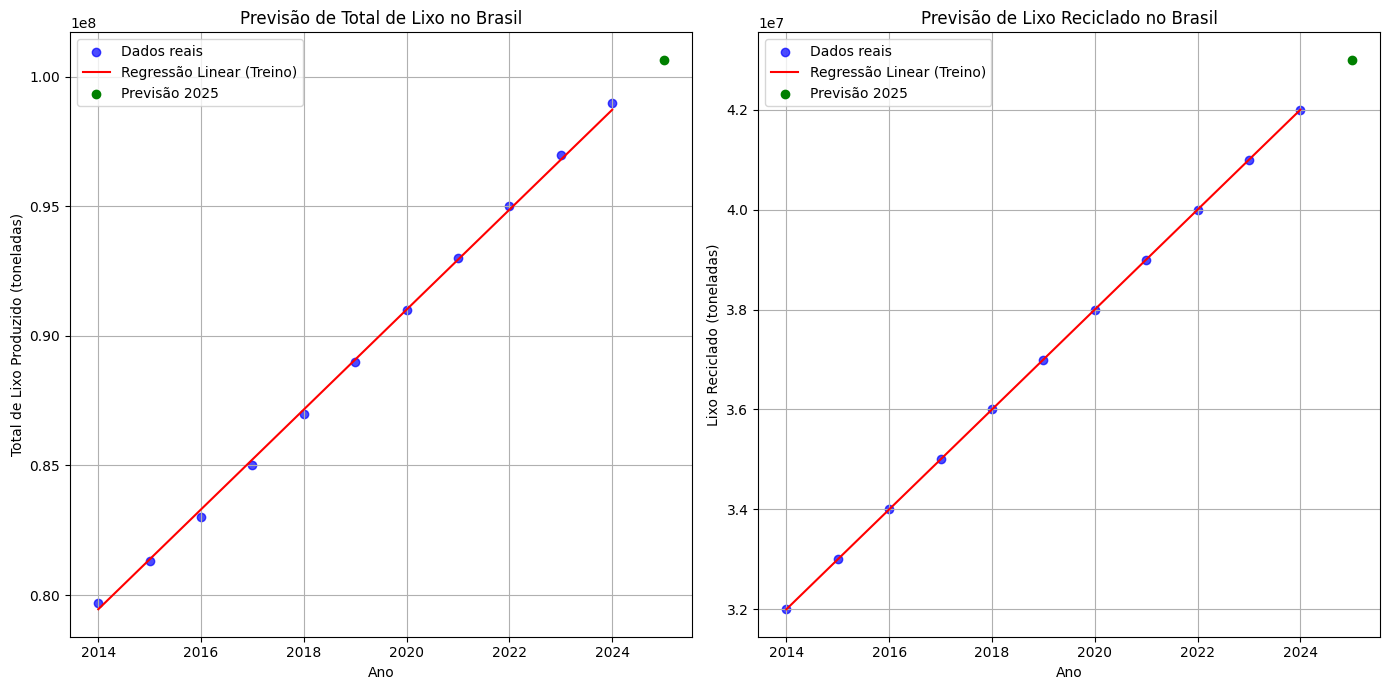

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Definir variáveis independentes (anos) e dependentes (total de lixo e lixo reciclado)
X = df_brasil[['ano']]
y_total_lixo = df_brasil['total_lixo']
y_lixo_reciclado = df_brasil['lixo_reciclado']

# Dividir os dados em treino e teste (usando 1/3 para teste)
X_train, X_test, y_train_total_lixo, y_test_total_lixo = train_test_split(X, y_total_lixo, test_size=1/3, random_state=0)

# Reutilizar a mesma divisão de X_train e X_test para lixo reciclado
y_train_lixo_reciclado, y_test_lixo_reciclado = train_test_split(y_lixo_reciclado, test_size=1/3, random_state=0)

# Ajustar o modelo de regressão linear para total de lixo usando dados de treino
modelo_total_lixo = LinearRegression()
modelo_total_lixo.fit(X_train, y_train_total_lixo)

# Ajustar o modelo de regressão linear para lixo reciclado usando dados de treino
modelo_lixo_reciclado = LinearRegression()
modelo_lixo_reciclado.fit(X_train, y_train_lixo_reciclado)

# Prever para o ano de 2025 com consistência no formato de entrada
ano_2025 = pd.DataFrame([[2025]], columns=['ano'])  # Criar DataFrame com nome de coluna

previsao_total_lixo = modelo_total_lixo.predict(ano_2025)[0]
previsao_lixo_reciclado = modelo_lixo_reciclado.predict(ano_2025)[0]

print(f"Previsão de total de lixo para 2025: {previsao_total_lixo:.2f} toneladas")
print(f"Previsão de lixo reciclado para 2025: {previsao_lixo_reciclado:.2f} toneladas")

# Previsões no conjunto de teste para avaliar o desempenho do modelo
y_total_lixo_pred = modelo_total_lixo.predict(X_test)
y_lixo_reciclado_pred = modelo_lixo_reciclado.predict(X_test)

# Calcular métricas de desempenho para total de lixo no conjunto de teste
mae_total_lixo = mean_absolute_error(y_test_total_lixo, y_total_lixo_pred)
mse_total_lixo = mean_squared_error(y_test_total_lixo, y_total_lixo_pred)
rmse_total_lixo = np.sqrt(mse_total_lixo)
r2_total_lixo = r2_score(y_test_total_lixo, y_total_lixo_pred)

# Calcular métricas de desempenho para lixo reciclado no conjunto de teste
mae_lixo_reciclado = mean_absolute_error(y_test_lixo_reciclado, y_lixo_reciclado_pred)
mse_lixo_reciclado = mean_squared_error(y_test_lixo_reciclado, y_lixo_reciclado_pred)
rmse_lixo_reciclado = np.sqrt(mse_lixo_reciclado)
r2_lixo_reciclado = r2_score(y_test_lixo_reciclado, y_lixo_reciclado_pred)

# Exibir métricas de desempenho
print("\nMétricas de desempenho para total de lixo (teste):")
print(f"MAE: {mae_total_lixo:.2f}")
print(f"MSE: {mse_total_lixo:.2f}")
print(f"RMSE: {rmse_total_lixo:.2f}")
print(f"R²: {r2_total_lixo:.2f}")

# Gerar gráficos
plt.figure(figsize=(14, 7))

# Gráfico do total de lixo
plt.subplot(1, 2, 1)
plt.scatter(X, y_total_lixo, color='blue', alpha=0.7, label='Dados reais')
plt.plot(X, modelo_total_lixo.predict(X), color='red', label='Regressão Linear (Treino)')
plt.scatter(2025, previsao_total_lixo, color='green', label='Previsão 2025')
plt.title('Previsão de Total de Lixo no Brasil')
plt.xlabel('Ano')
plt.ylabel('Total de Lixo Produzido (toneladas)')
plt.legend()
plt.grid(True)

# Gráfico do lixo reciclado
plt.subplot(1, 2, 2)
plt.scatter(X, y_lixo_reciclado, color='blue', alpha=0.7, label='Dados reais')
plt.plot(X, modelo_lixo_reciclado.predict(X), color='red', label='Regressão Linear (Treino)')
plt.scatter(2025, previsao_lixo_reciclado, color='green', label='Previsão 2025')
plt.title('Previsão de Lixo Reciclado no Brasil')
plt.xlabel('Ano')
plt.ylabel('Lixo Reciclado (toneladas)')
plt.legend()
plt.grid(True)

# Mostrar gráficos
plt.tight_layout()
plt.show()


# Modelo 1 - Gráfico de barras
- Regressão Linear Multipla
- Treino, Teste e Previsão
- Variáveis independetes (ano, pib, populacao)
- Variáveis dependetes (total_lixo, lixo_reciclado)

MSE (Total Lixo): 3.59e+10, R2 (Total Lixo): 1.00
MSE (Lixo Reciclado): 5.68e-14, R2 (Lixo Reciclado): 1.00
Previsão de total de lixo para 2025: 101344500.18 toneladas
Previsão de lixo reciclado para 2025: 43000000.00 toneladas


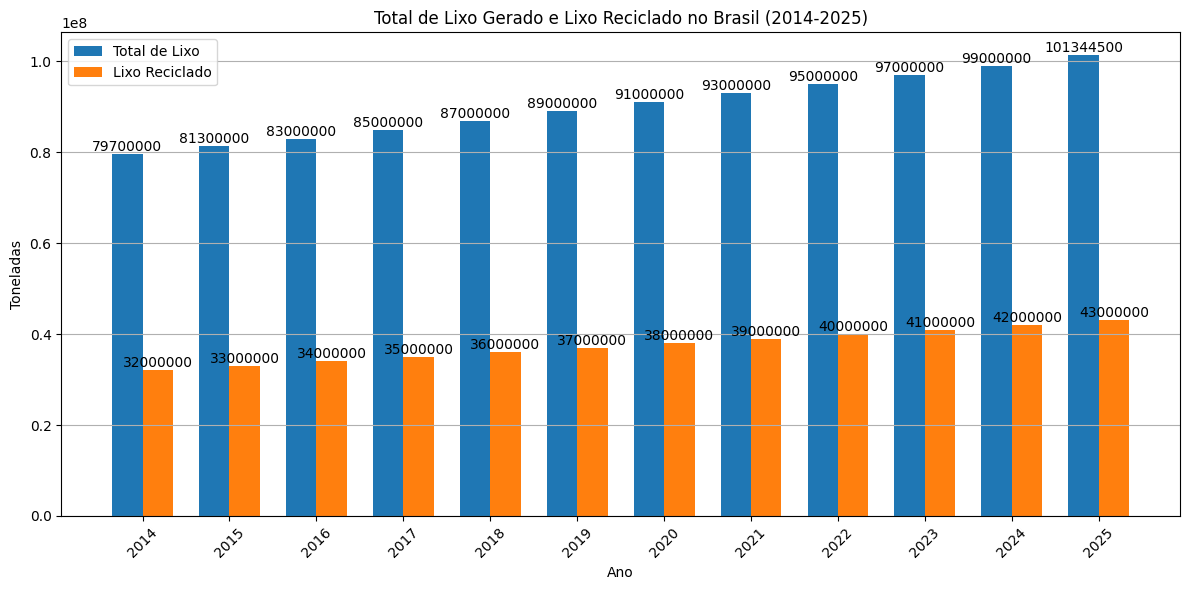

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Definir variáveis independentes (ano, PIB e população) e dependentes (total de lixo e lixo reciclado)
X = df_brasil[['ano', 'pib', 'populacao']]
y_total_lixo = df_brasil['total_lixo']
y_lixo_reciclado = df_brasil['lixo_reciclado']

# Dividir os dados em treino e teste (usando 1/3 para teste)
X_train, X_test, y_train_total_lixo, y_test_total_lixo = train_test_split(X, y_total_lixo, test_size=1/3, random_state=0)
# Reutilizar a mesma divisão de X_train e X_test para lixo reciclado
_, _, y_train_lixo_reciclado, y_test_lixo_reciclado = train_test_split(X, y_lixo_reciclado, test_size=1/3, random_state=0)

# Ajustar o modelo de regressão linear para total de lixo
model_total_lixo = LinearRegression()
model_total_lixo.fit(X_train, y_train_total_lixo)

# Ajustar o modelo de regressão linear para lixo reciclado
model_lixo_reciclado = LinearRegression()
model_lixo_reciclado.fit(X_train, y_train_lixo_reciclado)

# Prever para o conjunto de teste
y_pred_total_lixo = model_total_lixo.predict(X_test)
y_pred_lixo_reciclado = model_lixo_reciclado.predict(X_test)

# Avaliar o modelo com métricas de erro
mse_total_lixo = mean_squared_error(y_test_total_lixo, y_pred_total_lixo)
r2_total_lixo = r2_score(y_test_total_lixo, y_pred_total_lixo)

mse_lixo_reciclado = mean_squared_error(y_test_lixo_reciclado, y_pred_lixo_reciclado)
r2_lixo_reciclado = r2_score(y_test_lixo_reciclado, y_pred_lixo_reciclado)

print(f'MSE (Total Lixo): {mse_total_lixo:.2e}, R2 (Total Lixo): {r2_total_lixo:.2f}')
print(f'MSE (Lixo Reciclado): {mse_lixo_reciclado:.2e}, R2 (Lixo Reciclado): {r2_lixo_reciclado:.2f}')

# Valores esperados de PIB e população para 2025
ano_2025 = 2025
pib_2025 = 2800000000000  # Exemplo de PIB estimado para 2025
populacao_2025 = 217000000  # Exemplo de população estimada para 2025

# Prever para o ano de 2025 com consistência no formato de entrada
X_2025 = pd.DataFrame([[ano_2025, pib_2025, populacao_2025]], columns=['ano', 'pib', 'populacao'])
previsao_total_lixo = model_total_lixo.predict(X_2025)[0]
previsao_lixo_reciclado = model_lixo_reciclado.predict(X_2025)[0]

print(f"Previsão de total de lixo para 2025: {previsao_total_lixo:.2f} toneladas")
print(f"Previsão de lixo reciclado para 2025: {previsao_lixo_reciclado:.2f} toneladas")

# Adicionar previsões de 2025 ao dataframe
df_brasil_2025 = pd.DataFrame({
    'ano': [2025],
    'total_lixo': [previsao_total_lixo],
    'lixo_reciclado': [previsao_lixo_reciclado]
})
df_brasil = pd.concat([df_brasil, df_brasil_2025], ignore_index=True)

# Gerar gráfico de barras
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(df_brasil))

# Barras para total de lixo
bars_total = plt.bar(indices, df_brasil['total_lixo'], bar_width, label='Total de Lixo')

# Barras para lixo reciclado
bars_reciclado = plt.bar(indices + bar_width, df_brasil['lixo_reciclado'], bar_width, label='Lixo Reciclado')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.title('Total de Lixo Gerado e Lixo Reciclado no Brasil (2014-2025)')
plt.xticks(indices + bar_width / 2, df_brasil['ano'], rotation=45)
plt.legend()
plt.grid(axis='y')

# Adicionar valores numéricos nas barras
for bar in bars_total:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

for bar in bars_reciclado:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Mostrar gráfico
plt.tight_layout()
plt.show()


# Modelo de regressão linear múltipla
# Modelo 2
## Gráfico de barras

MSE (Total Lixo): 35865396813.72, R2 (Total Lixo): 1.00
MSE (Lixo Reciclado): 0.00, R2 (Lixo Reciclado): 1.00


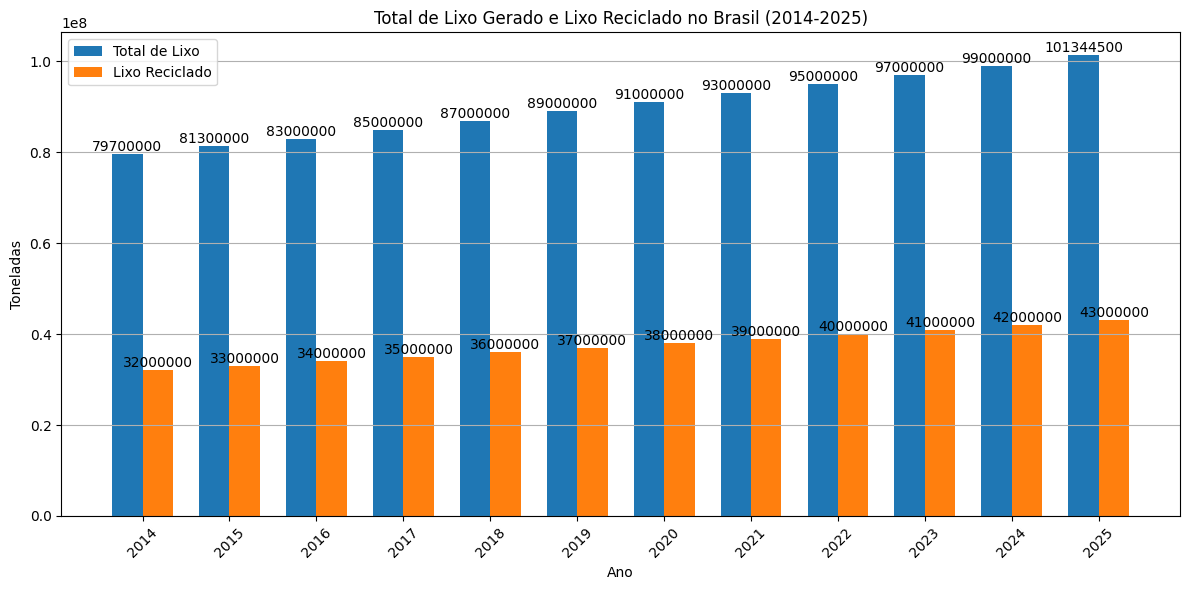

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar os dados para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Definir variáveis independentes (ano, PIB e população) e dependentes (total de lixo e lixo reciclado)
X = df_brasil[['ano', 'pib', 'populacao']]
y = df_brasil[['total_lixo', 'lixo_reciclado']]

# Dividir os dados em treino e teste (usando 1/3 para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Separar variáveis dependentes
y_train_total_lixo = y_train['total_lixo']
y_train_lixo_reciclado = y_train['lixo_reciclado']
y_test_total_lixo = y_test['total_lixo']
y_test_lixo_reciclado = y_test['lixo_reciclado']

# Ajustar o modelo de regressão linear para total de lixo
model_total_lixo = LinearRegression()
model_total_lixo.fit(X_train, y_train_total_lixo)

# Ajustar o modelo de regressão linear para lixo reciclado
model_lixo_reciclado = LinearRegression()
model_lixo_reciclado.fit(X_train, y_train_lixo_reciclado)

# Prever para o conjunto de teste
y_pred_total_lixo = model_total_lixo.predict(X_test)
y_pred_lixo_reciclado = model_lixo_reciclado.predict(X_test)

# Avaliar o modelo com métricas de erro
mse_total_lixo = mean_squared_error(y_test_total_lixo, y_pred_total_lixo)
r2_total_lixo = r2_score(y_test_total_lixo, y_pred_total_lixo)

mse_lixo_reciclado = mean_squared_error(y_test_lixo_reciclado, y_pred_lixo_reciclado)
r2_lixo_reciclado = r2_score(y_test_lixo_reciclado, y_pred_lixo_reciclado)

print(f'MSE (Total Lixo): {mse_total_lixo:.2f}, R2 (Total Lixo): {r2_total_lixo:.2f}')
print(f'MSE (Lixo Reciclado): {mse_lixo_reciclado:.2f}, R2 (Lixo Reciclado): {r2_lixo_reciclado:.2f}')

# Valores esperados de PIB e população para 2025
ano_2025 = 2025
pib_2025 = 2800000000000  # Exemplo de PIB estimado para 2025
populacao_2025 = 217000000  # Exemplo de população estimada para 2025

# Prever para o ano de 2025
X_2025 = pd.DataFrame([[ano_2025, pib_2025, populacao_2025]], columns=['ano', 'pib', 'populacao'])
previsao_total_lixo = model_total_lixo.predict(X_2025)[0]
previsao_lixo_reciclado = model_lixo_reciclado.predict(X_2025)[0]

# Adicionar previsões de 2025 ao dataframe
df_brasil_2025 = pd.DataFrame({
    'ano': [2025],
    'pib': [pib_2025],
    'populacao': [populacao_2025],
    'total_lixo': [previsao_total_lixo],
    'lixo_reciclado': [previsao_lixo_reciclado]
})
df_brasil = pd.concat([df_brasil, df_brasil_2025], ignore_index=True)

# Gerar gráfico de barras
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(df_brasil))

# Barras para total de lixo
bars_total = plt.bar(indices, df_brasil['total_lixo'], bar_width, label='Total de Lixo')

# Barras para lixo reciclado
bars_reciclado = plt.bar(indices + bar_width, df_brasil['lixo_reciclado'], bar_width, label='Lixo Reciclado')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.title('Total de Lixo Gerado e Lixo Reciclado no Brasil (2014-2025)')
plt.xticks(indices + bar_width / 2, df_brasil['ano'], rotation=45)
plt.legend()
plt.grid(axis='y')

# Adicionar valores numéricos nas barras
for bar in bars_total:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

for bar in bars_reciclado:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Mostrar gráfico
plt.tight_layout()
plt.show()


# Randon Forest
## Modelo 3
## Gráfico de barras


Acurácia para o total de lixo (R²): 0.9454
Erro absoluto médio para o total de lixo (MAE): 1491666.67 toneladas
Erro quadrático médio para o total de lixo (RMSE): 1652314.03 toneladas
Acurácia para o lixo reciclado (R²): 0.9320
Erro absoluto médio para o lixo reciclado (MAE): 833333.33 toneladas
Erro quadrático médio para o lixo reciclado (RMSE): 960243.02 toneladas
Previsão do total de lixo em 2025: 97580000.00 toneladas
Previsão do lixo reciclado em 2025: 41290000.00 toneladas


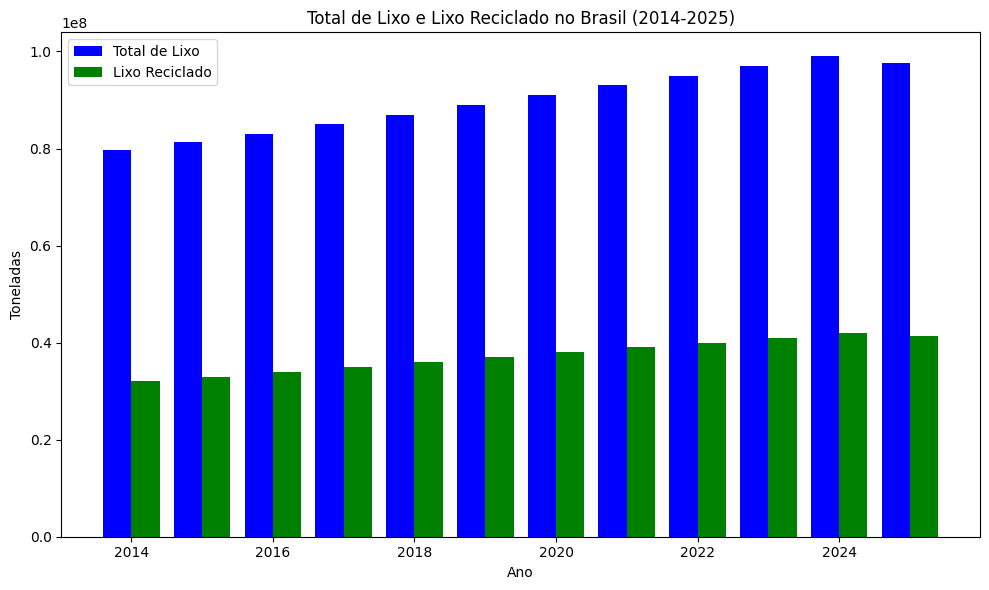

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados do Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Selecionar variáveis independentes (X) e dependentes (y)
X = df_brasil[['ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel', 'lixo_metal', 'lixo_plastico', 'lixo_vidro',
               'lixo_madeira', 'lixo_borracha', 'lixo_entulho', 'lixo_medico', 'outros_lixos']]
y_lixo = df_brasil['total_lixo']
y_reciclado = df_brasil['lixo_reciclado']

# Dividir os dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train_lixo, y_test_lixo = train_test_split(X, y_lixo, test_size=0.2, random_state=42)
_, _, y_train_reciclado, y_test_reciclado = train_test_split(X, y_reciclado, test_size=0.2, random_state=42)

# Criar o modelo Random Forest para o total de lixo
rf_lixo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_lixo.fit(X_train, y_train_lixo)

# Criar o modelo Random Forest para o lixo reciclado
rf_reciclado = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reciclado.fit(X_train, y_train_reciclado)

# Fazer previsões
y_pred_lixo = rf_lixo.predict(X_test)
y_pred_reciclado = rf_reciclado.predict(X_test)

# Avaliar os modelos
r2_lixo = r2_score(y_test_lixo, y_pred_lixo)
mae_lixo = mean_absolute_error(y_test_lixo, y_pred_lixo)
rmse_lixo = np.sqrt(mean_squared_error(y_test_lixo, y_pred_lixo))

r2_reciclado = r2_score(y_test_reciclado, y_pred_reciclado)
mae_reciclado = mean_absolute_error(y_test_reciclado, y_pred_reciclado)
rmse_reciclado = np.sqrt(mean_squared_error(y_test_reciclado, y_pred_reciclado))

print(f"Acurácia para o total de lixo (R²): {r2_lixo:.4f}")
print(f"Erro absoluto médio para o total de lixo (MAE): {mae_lixo:.2f} toneladas")
print(f"Erro quadrático médio para o total de lixo (RMSE): {rmse_lixo:.2f} toneladas")

print(f"Acurácia para o lixo reciclado (R²): {r2_reciclado:.4f}")
print(f"Erro absoluto médio para o lixo reciclado (MAE): {mae_reciclado:.2f} toneladas")
print(f"Erro quadrático médio para o lixo reciclado (RMSE): {rmse_reciclado:.2f} toneladas")

# Previsões para o ano de 2025
ultimo_ano = df_brasil.iloc[-1]  # Dados do último ano (2024)
dados_2025 = {
    'ano': [2025],
    'pib': [ultimo_ano['pib']],
    'populacao': [ultimo_ano['populacao']],
    'lixo_organico': [ultimo_ano['lixo_organico']],
    'lixo_papel': [ultimo_ano['lixo_papel']],
    'lixo_metal': [ultimo_ano['lixo_metal']],
    'lixo_plastico': [ultimo_ano['lixo_plastico']],
    'lixo_vidro': [ultimo_ano['lixo_vidro']],
    'lixo_madeira': [ultimo_ano['lixo_madeira']],
    'lixo_borracha': [ultimo_ano['lixo_borracha']],
    'lixo_entulho': [ultimo_ano['lixo_entulho']],
    'lixo_medico': [ultimo_ano['lixo_medico']],
    'outros_lixos': [ultimo_ano['outros_lixos']]
}

# Criar DataFrame para 2025
df_2025 = pd.DataFrame(dados_2025)

# Fazer previsões para 2025
previsao_lixo_2025 = rf_lixo.predict(df_2025)
previsao_reciclado_2025 = rf_reciclado.predict(df_2025)

print(f"Previsão do total de lixo em 2025: {previsao_lixo_2025[0]:.2f} toneladas")
print(f"Previsão do lixo reciclado em 2025: {previsao_reciclado_2025[0]:.2f} toneladas")

# Adicionar 2025 ao gráfico
anos = np.append(df_brasil['ano'].values, 2025)
total_lixo = np.append(df_brasil['total_lixo'].values, previsao_lixo_2025)
lixo_reciclado = np.append(df_brasil['lixo_reciclado'].values, previsao_reciclado_2025)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(anos - 0.2, total_lixo, width=0.4, label='Total de Lixo', align='center', color='blue')
plt.bar(anos + 0.2, lixo_reciclado, width=0.4, label='Lixo Reciclado', align='center', color='green')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.title('Total de Lixo e Lixo Reciclado no Brasil (2014-2025)')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Regressão Polinomial
# Modelo 5
## Gráfico de barras

Acurácia para o total de lixo (R²): 0.9997
Erro absoluto médio para o total de lixo (MAE): 85987.96 toneladas
Erro quadrático médio para o total de lixo (RMSE): 113010.17 toneladas
Acurácia para o lixo reciclado (R²): 0.9996
Erro absoluto médio para o lixo reciclado (MAE): 53342.45 toneladas
Erro quadrático médio para o lixo reciclado (RMSE): 74001.68 toneladas
Previsão do total de lixo em 2025: 99000000.00 toneladas
Previsão do lixo reciclado em 2025: 42000000.00 toneladas


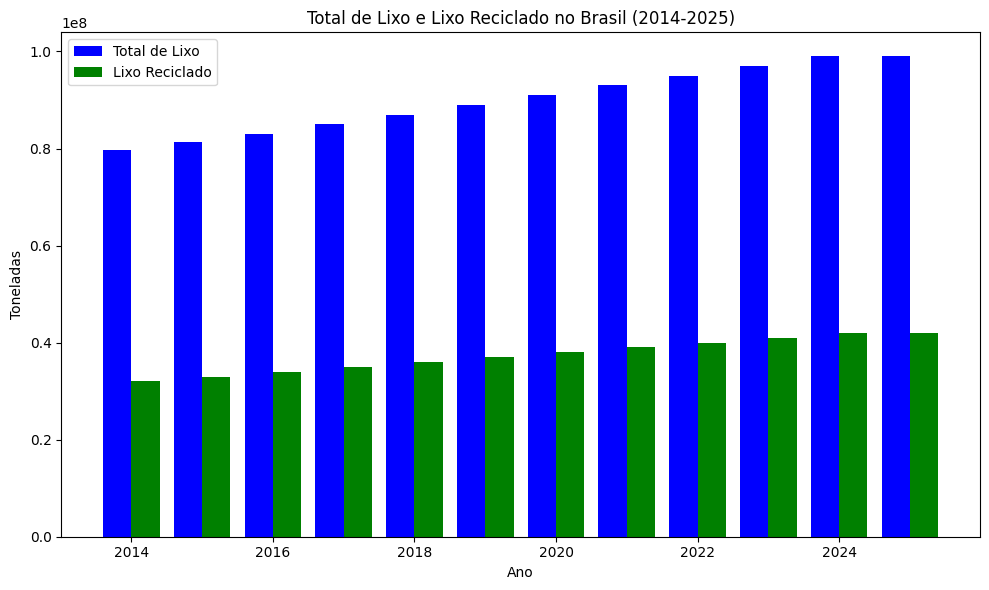

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados do Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Selecionar variáveis independentes (X) e dependentes (y)
X = df_brasil[['ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel', 'lixo_metal', 'lixo_plastico', 'lixo_vidro',
               'lixo_madeira', 'lixo_borracha', 'lixo_entulho', 'lixo_medico', 'outros_lixos']].values  # Garantir numpy.array
y_lixo = df_brasil['total_lixo'].values
y_reciclado = df_brasil['lixo_reciclado'].values

# Dividir os dados em treino e teste (80% treino, 20% teste) para ambos os modelos
X_train, X_test, y_train_lixo, y_test_lixo = train_test_split(X, y_lixo, test_size=0.2, random_state=42)
_, _, y_train_reciclado, y_test_reciclado = train_test_split(X, y_reciclado, test_size=0.2, random_state=42)

# Transformação polinomial (grau=2 para polinômio de segundo grau, pode ser ajustado)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Ajusta e transforma
X_test_poly = poly.transform(X_test)       # Transforma mantendo consistência

# Criar e treinar o modelo de regressão linear para total de lixo
regressor_lixo = LinearRegression()
regressor_lixo.fit(X_train_poly, y_train_lixo)

# Criar e treinar o modelo de regressão linear para lixo reciclado
regressor_reciclado = LinearRegression()
regressor_reciclado.fit(X_train_poly, y_train_reciclado)

# Fazer previsões
y_pred_lixo = regressor_lixo.predict(X_test_poly)
y_pred_reciclado = regressor_reciclado.predict(X_test_poly)

# Avaliar os modelos
r2_lixo = r2_score(y_test_lixo, y_pred_lixo)
mae_lixo = mean_absolute_error(y_test_lixo, y_pred_lixo)
rmse_lixo = np.sqrt(mean_squared_error(y_test_lixo, y_pred_lixo))

r2_reciclado = r2_score(y_test_reciclado, y_pred_reciclado)
mae_reciclado = mean_absolute_error(y_test_reciclado, y_pred_reciclado)
rmse_reciclado = np.sqrt(mean_squared_error(y_test_reciclado, y_pred_reciclado))

print(f"Acurácia para o total de lixo (R²): {r2_lixo:.4f}")
print(f"Erro absoluto médio para o total de lixo (MAE): {mae_lixo:.2f} toneladas")
print(f"Erro quadrático médio para o total de lixo (RMSE): {rmse_lixo:.2f} toneladas")

print(f"Acurácia para o lixo reciclado (R²): {r2_reciclado:.4f}")
print(f"Erro absoluto médio para o lixo reciclado (MAE): {mae_reciclado:.2f} toneladas")
print(f"Erro quadrático médio para o lixo reciclado (RMSE): {rmse_reciclado:.2f} toneladas")

# Previsão para 2025 com base nos dados de 2024
ultimo_ano = df_brasil.iloc[-1]

X_2025 = np.array([[
    2025,
    ultimo_ano['pib'],
    ultimo_ano['populacao'],
    ultimo_ano['lixo_organico'],
    ultimo_ano['lixo_papel'],
    ultimo_ano['lixo_metal'],
    ultimo_ano['lixo_plastico'],
    ultimo_ano['lixo_vidro'],
    ultimo_ano['lixo_madeira'],
    ultimo_ano['lixo_borracha'],
    ultimo_ano['lixo_entulho'],
    ultimo_ano['lixo_medico'],
    ultimo_ano['outros_lixos']
]])

# Transformar os dados para formato polinomial
X_2025_poly = poly.transform(X_2025)  # Sem ajuste adicional necessário

# Fazer previsões para 2025
previsao_lixo_2025 = regressor_lixo.predict(X_2025_poly)
previsao_reciclado_2025 = regressor_reciclado.predict(X_2025_poly)

print(f"Previsão do total de lixo em 2025: {previsao_lixo_2025[0]:.2f} toneladas")
print(f"Previsão do lixo reciclado em 2025: {previsao_reciclado_2025[0]:.2f} toneladas")

# Adicionar previsão de 2025 no gráfico
anos = np.append(df_brasil['ano'].values, 2025)
total_lixo = np.append(df_brasil['total_lixo'].values, previsao_lixo_2025[0])
lixo_reciclado = np.append(df_brasil['lixo_reciclado'].values, previsao_reciclado_2025[0])

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(anos - 0.2, total_lixo, width=0.4, label='Total de Lixo', align='center', color='blue')
plt.bar(anos + 0.2, lixo_reciclado, width=0.4, label='Lixo Reciclado', align='center', color='green')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.title('Total de Lixo e Lixo Reciclado no Brasil (2014-2025)')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# k-NN
## Modelo 6
## Gráfico de barras

Acurácia para o total de lixo (R²): -0.0564
Erro absoluto médio para o total de lixo (MAE): 6166666.67 toneladas
Erro quadrático médio para o total de lixo (RMSE): 7265929.63 toneladas
Acurácia para o lixo reciclado (R²): -0.0643
Erro absoluto médio para o lixo reciclado (MAE): 3200000.00 toneladas
Erro quadrático médio para o lixo reciclado (RMSE): 3798245.21 toneladas
Previsão do total de lixo em 2025: 90260000.00 toneladas
Previsão do lixo reciclado em 2025: 37600000.00 toneladas


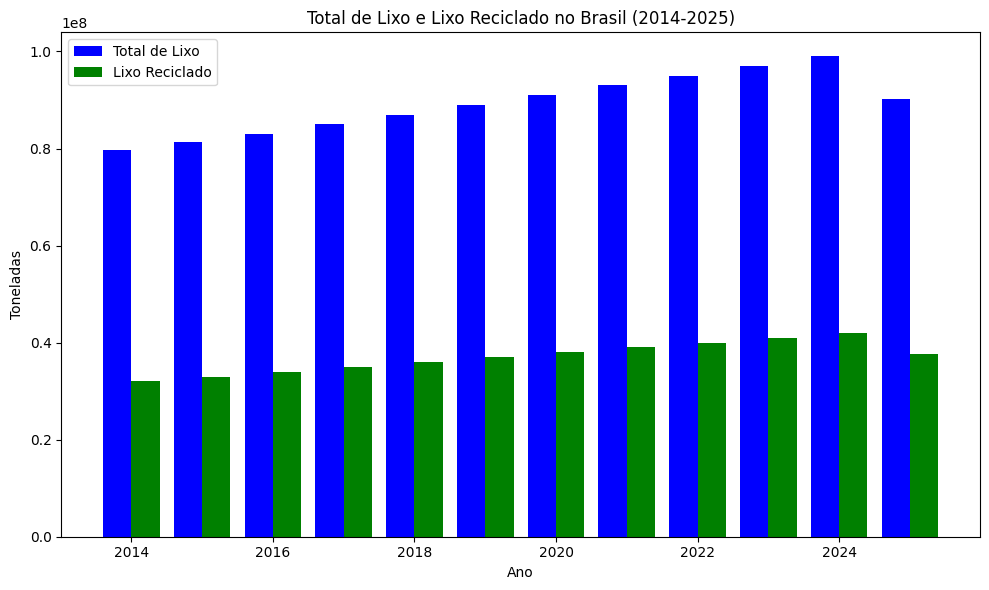

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Filtrar os dados do Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Selecionar variáveis independentes (X) e dependentes (y)
X = df_brasil[['ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel', 'lixo_metal', 'lixo_plastico', 'lixo_vidro',
               'lixo_madeira', 'lixo_borracha', 'lixo_entulho', 'lixo_medico', 'outros_lixos']].values
y_lixo = df_brasil['total_lixo'].values
y_reciclado = df_brasil['lixo_reciclado'].values

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train_lixo, y_test_lixo = train_test_split(X, y_lixo, test_size=0.2, random_state=42)
_, _, y_train_reciclado, y_test_reciclado = train_test_split(X, y_reciclado, test_size=0.2, random_state=42)

# Criar e treinar o modelo k-NN para o total de lixo
knn_lixo = KNeighborsRegressor(n_neighbors=5)  # Definindo k como 5
knn_lixo.fit(X_train, y_train_lixo)

# Criar e treinar o modelo k-NN para o lixo reciclado
knn_reciclado = KNeighborsRegressor(n_neighbors=5)
knn_reciclado.fit(X_train, y_train_reciclado)

# Fazer previsões
y_pred_lixo = knn_lixo.predict(X_test)
y_pred_reciclado = knn_reciclado.predict(X_test)

# Avaliar os modelos
r2_lixo = r2_score(y_test_lixo, y_pred_lixo)
mae_lixo = mean_absolute_error(y_test_lixo, y_pred_lixo)
rmse_lixo = np.sqrt(mean_squared_error(y_test_lixo, y_pred_lixo))

r2_reciclado = r2_score(y_test_reciclado, y_pred_reciclado)
mae_reciclado = mean_absolute_error(y_test_reciclado, y_pred_reciclado)
rmse_reciclado = np.sqrt(mean_squared_error(y_test_reciclado, y_pred_reciclado))

print(f"Acurácia para o total de lixo (R²): {r2_lixo:.4f}")
print(f"Erro absoluto médio para o total de lixo (MAE): {mae_lixo:.2f} toneladas")
print(f"Erro quadrático médio para o total de lixo (RMSE): {rmse_lixo:.2f} toneladas")

print(f"Acurácia para o lixo reciclado (R²): {r2_reciclado:.4f}")
print(f"Erro absoluto médio para o lixo reciclado (MAE): {mae_reciclado:.2f} toneladas")
print(f"Erro quadrático médio para o lixo reciclado (RMSE): {rmse_reciclado:.2f} toneladas")

# Previsão para 2025 com base nos dados do último ano
ultimo_ano = df_brasil.iloc[-1]

X_2025 = np.array([[
    2025,
    ultimo_ano['pib'],
    ultimo_ano['populacao'],
    ultimo_ano['lixo_organico'],
    ultimo_ano['lixo_papel'],
    ultimo_ano['lixo_metal'],
    ultimo_ano['lixo_plastico'],
    ultimo_ano['lixo_vidro'],
    ultimo_ano['lixo_madeira'],
    ultimo_ano['lixo_borracha'],
    ultimo_ano['lixo_entulho'],
    ultimo_ano['lixo_medico'],
    ultimo_ano['outros_lixos']
]])

# Fazer previsões para 2025
previsao_lixo_2025 = knn_lixo.predict(X_2025)
previsao_reciclado_2025 = knn_reciclado.predict(X_2025)

print(f"Previsão do total de lixo em 2025: {previsao_lixo_2025[0]:.2f} toneladas")
print(f"Previsão do lixo reciclado em 2025: {previsao_reciclado_2025[0]:.2f} toneladas")

# Atualizar os dados para o gráfico
anos = np.append(df_brasil['ano'].values, 2025)
total_lixo = np.append(df_brasil['total_lixo'].values, previsao_lixo_2025[0])
lixo_reciclado = np.append(df_brasil['lixo_reciclado'].values, previsao_reciclado_2025[0])

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(anos - 0.2, total_lixo, width=0.4, label='Total de Lixo', color='blue', align='center')
plt.bar(anos + 0.2, lixo_reciclado, width=0.4, label='Lixo Reciclado', color='green', align='center')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.title('Total de Lixo e Lixo Reciclado no Brasil (2014-2025)')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Outros Gráficos
## Gráfico de Linhas - PIB x Produção de lixo

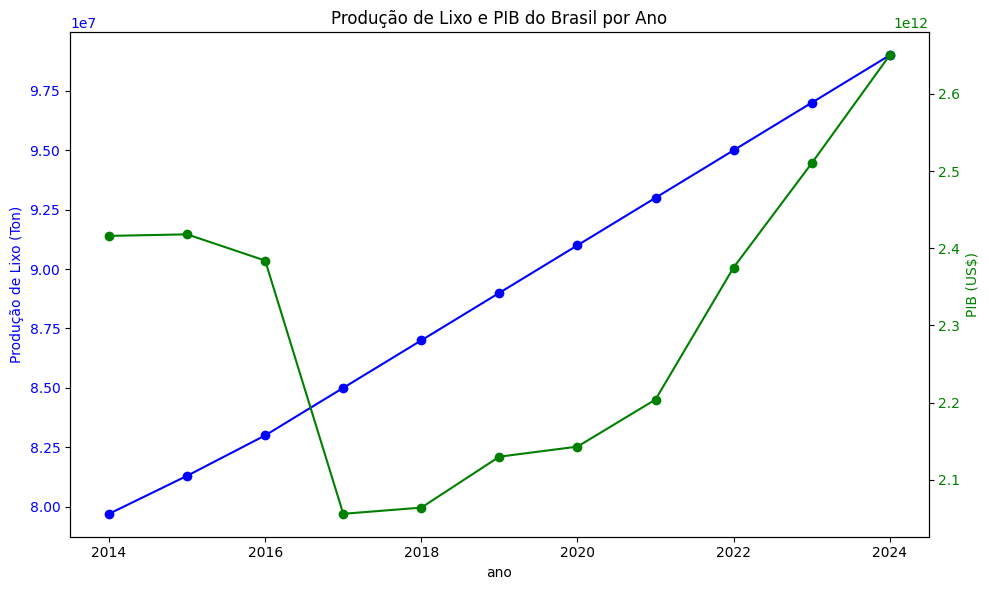

In [ ]:
# Filtrar os dados apenas para o Brasil
df_brasil = df[df["pais"] == "Brasil"]

# Obter os anos, produção de lixo total e PIB
anos = df_brasil["ano"]
lixo_total = df_brasil["total_lixo"]
pib = df_brasil["pib"]

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(10,6))

# Primeiro eixo Y (para produção de lixo)
ax1.set_xlabel('ano')
ax1.set_ylabel('Produção de Lixo (Ton)', color='b')
ax1.plot(anos, lixo_total, label='Produção de Lixo (Ton)', color='b', marker='o')
ax1.tick_params(axis='y', labelcolor='b')

# Segundo eixo Y (para PIB)
ax2 = ax1.twinx()
ax2.set_ylabel('PIB (US$)', color='g')
ax2.plot(anos, pib, label='PIB (US$)', color='g', marker='o')
ax2.tick_params(axis='y', labelcolor='g')

# Título e exibição do gráfico
plt.title('Produção de Lixo e PIB do Brasil por Ano')
fig.tight_layout()
plt.show()

# Gráfico de linhas - lixo produzido X lixo reciclado no Brasil

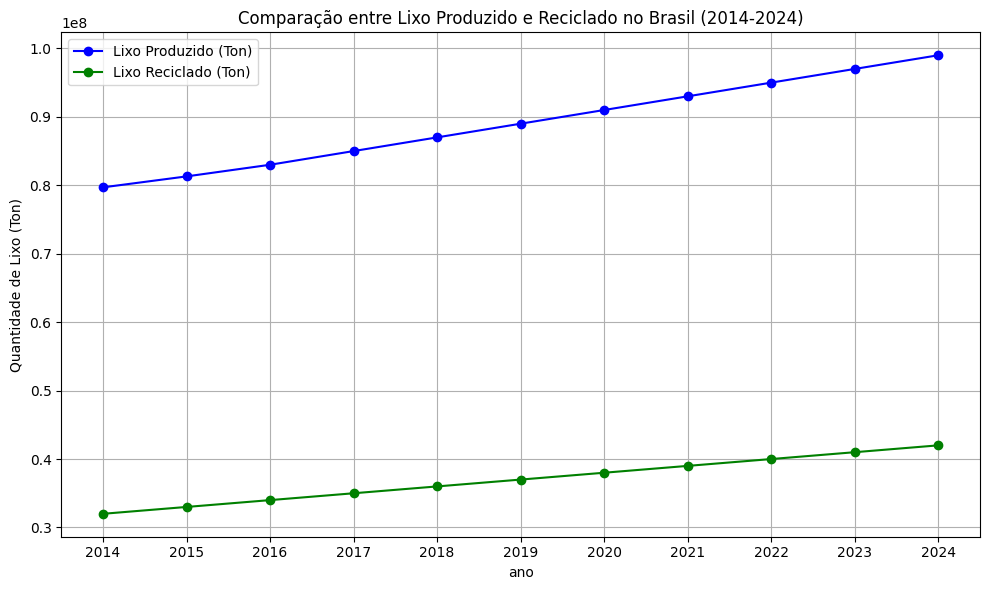

In [ ]:
# Filtrar os dados para o Brasil e os anos de 2014 a 2024
df_brasil = df[(df["pais"] == "Brasil") & (df["ano"] >= 2014) & (df["ano"] <= 2024)]

# Obter os anos, total de lixo e lixo reciclado
anos = df_brasil["ano"]
lixo_total = df_brasil["total_lixo"]
lixo_reciclado = df_brasil["lixo_reciclado"]

# Criar o gráfico de linhas
plt.figure(figsize=(10,6))

# Linha para o total de lixo produzido
plt.plot(anos, lixo_total, label='Lixo Produzido (Ton)', color='b', marker='o')

# Linha para o lixo reciclado
plt.plot(anos, lixo_reciclado, label='Lixo Reciclado (Ton)', color='g', marker='o')

# Configurações do gráfico
plt.xlabel('ano')
plt.ylabel('Quantidade de Lixo (Ton)')
plt.title('Comparação entre Lixo Produzido e Reciclado no Brasil (2014-2024)')
plt.xticks(anos)  # Colocar os anos no eixo x
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Lixo produzido por pessoa X PIB percapita
## Gráfico barras com linha

<ipython-input-88-16dd37964da2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil.loc[:, "Lixo por Pessoa (kg)"] = df_brasil["total_lixo"] * 1000 / df_brasil["populacao"]
<ipython-input-88-16dd37964da2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil.loc[:, "PIB per Capita (US$)"] = df_brasil["pib"] / df_brasil["populacao"]


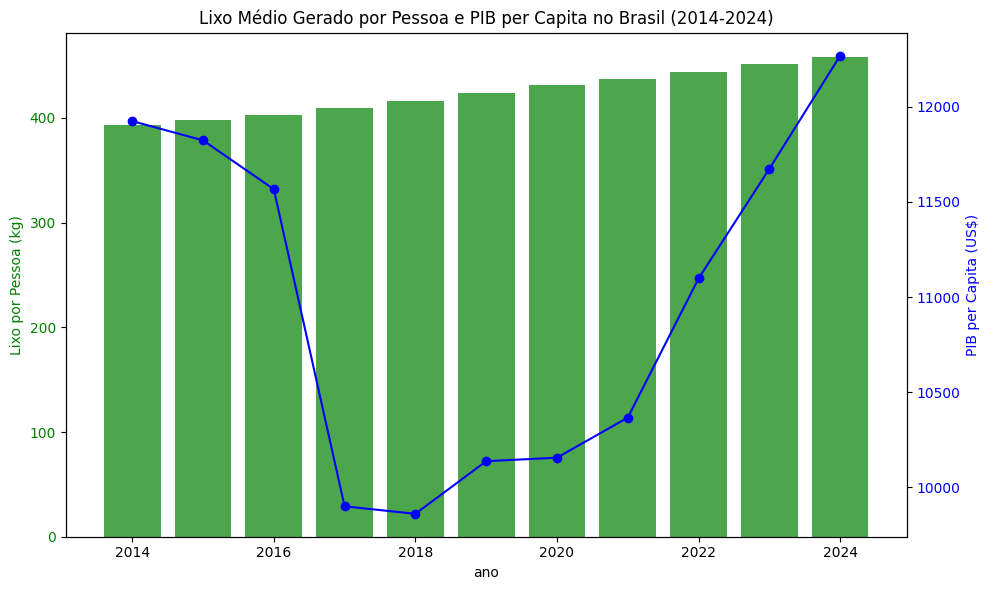

In [ ]:
# Filtrar os dados apenas para o Brasil
df_brasil = df.loc[df["pais"] == "Brasil"]

# Calcular a média de lixo gerado por pessoa
df_brasil.loc[:, "Lixo por Pessoa (kg)"] = df_brasil["total_lixo"] * 1000 / df_brasil["populacao"]

# Calcular o PIB per capita
df_brasil.loc[:, "PIB per Capita (US$)"] = df_brasil["pib"] / df_brasil["populacao"]

# Criar o gráfico de barras com dois eixos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para o lixo por pessoa
ax1.bar(df_brasil["ano"], df_brasil["Lixo por Pessoa (kg)"], color='green', alpha=0.7, label='Lixo por Pessoa (kg)')
ax1.set_xlabel('ano')
ax1.set_ylabel('Lixo por Pessoa (kg)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Criar um segundo eixo y para o PIB per capita
ax2 = ax1.twinx()
ax2.plot(df_brasil["ano"], df_brasil["PIB per Capita (US$)"], color='blue', marker='o', label='PIB per Capita (US$)')
ax2.set_ylabel('PIB per Capita (US$)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Título do gráfico
plt.title('Lixo Médio Gerado por Pessoa e PIB per Capita no Brasil (2014-2024)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Paises mais populosos do dataset 2024
## Gráfico Barras Horizontal

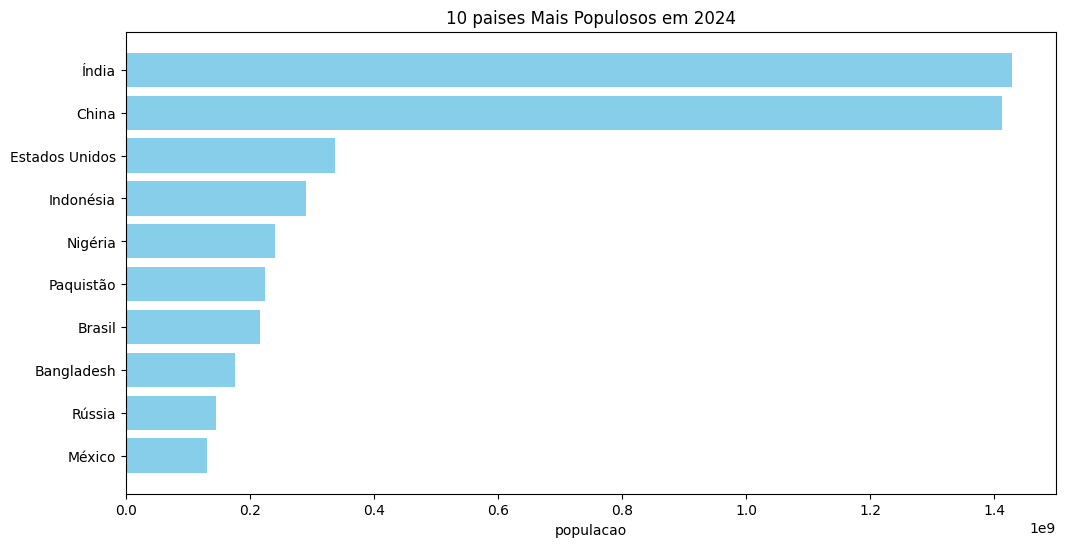

In [ ]:
# Filtrar os dados para o ano de 2024
df_2024 = df[df['ano'] == 2024]

# Agrupar os dados por país e pegar a populacao
populacao_por_pais = df_2024.groupby('pais')['populacao'].max().reset_index()  # Usando max() para pegar a maior populacao por pais
populacao_por_pais = populacao_por_pais.sort_values(by='populacao', ascending=False).head(10)  # Pegar os 10 mais populosos

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.barh(populacao_por_pais['pais'], populacao_por_pais['populacao'], color='skyblue')
plt.xlabel('populacao')
plt.title('10 paises Mais Populosos em 2024')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o país mais populoso fique no topo
plt.show()

# Produção de lixo ao longo dos anos top 10 Paises
## Gráfico de linhas

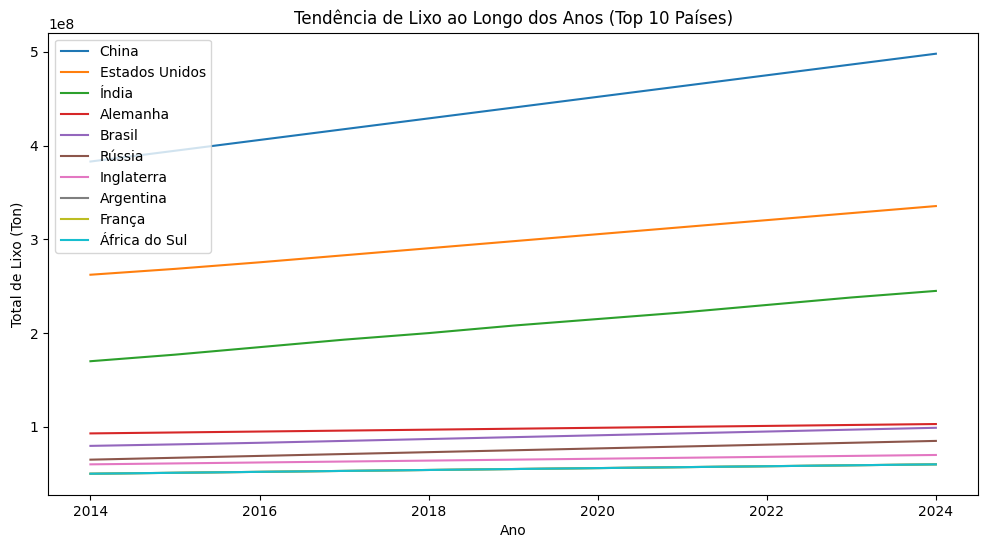

In [ ]:
# Calcular o total de lixo por país
total_lixo_por_pais = df.groupby('pais')['total_lixo'].sum()

# Selecionar os 10 países com maior total de lixo
top_10_paises = total_lixo_por_pais.nlargest(10).index

# Criar o gráfico para os 10 países mais lixo
plt.figure(figsize=(12, 6))

for pais in top_10_paises:
    subset = df[df['pais'] == pais]
    plt.plot(subset['ano'], subset['total_lixo'], label=pais)

plt.title('Tendência de Lixo ao Longo dos Anos (Top 10 Países)')
plt.xlabel('Ano')
plt.ylabel('Total de Lixo (Ton)')
plt.legend()
plt.show()

# Total de lixo gerado pelos top 10 paises
## Gráfico barras

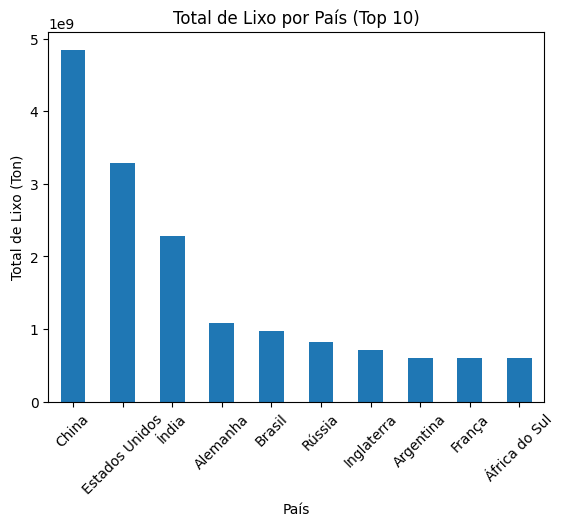

In [ ]:
# Agrupar e somar o total de lixo por país
total_lixo_por_pais = df.groupby('pais')['total_lixo'].sum()

# Obter os 10 países com o maior total de lixo
top_10_paises = total_lixo_por_pais.nlargest(10)

# Criar o gráfico de barras
top_10_paises.plot(kind='bar')
plt.title('Total de Lixo por País (Top 10)')
plt.ylabel('Total de Lixo (Ton)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()

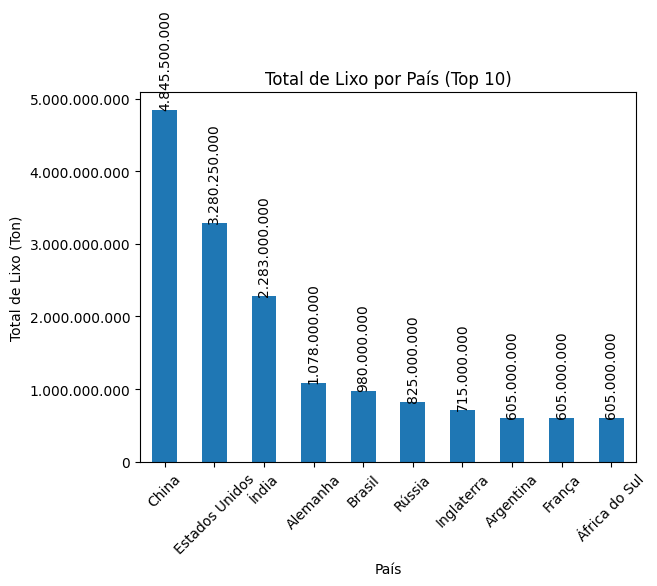

In [ ]:
import matplotlib.ticker as mtick

# Agrupar e somar o total de lixo por país
total_lixo_por_pais = df.groupby('pais')['total_lixo'].sum()

# Obter os 10 países com o maior total de lixo
top_10_paises = total_lixo_por_pais.nlargest(10)

# Criar o gráfico de barras
ax = top_10_paises.plot(kind='bar')

# Adicionar título e rótulos
plt.title('Total de Lixo por País (Top 10)')
plt.ylabel('Total de Lixo (Ton)')
plt.xlabel('País')
plt.xticks(rotation=45)

# Adicionar os valores de cada barra no gráfico
for i, value in enumerate(top_10_paises):
    # Formatar o valor com ponto para separador de milhar e vírgula para decimal
    formatted_value = f'{value:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(i, value + 1000, formatted_value, ha='center', va='bottom', fontsize=10, rotation=90)

# Ajustar os valores do eixo y para separar os milhares com ponto
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

# Mostrar o gráfico
plt.show()